# Modeling

In [161]:
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_confusion_matrix
from IPython.core.display import display, HTML
from sklearn.multiclass import OneVsRestClassifier #import classifier to for Logistic Multiclass problem
from sklearn.linear_model import LogisticRegression #import classifier
from sklearn.model_selection import RandomizedSearchCV #import Randomized search CV
from sklearn.ensemble import RandomForestClassifier

import pickle # to export/save models


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings('ignore')

In [2]:
X =pd.read_csv('../data/interim/explantorydf.csv', index_col=0) #read in features and target(s)
y = pd.read_csv('../data/interim/targetdf.csv', index_col=0)

In [171]:
#examples of Variables in Feature DF
X.head(0).T

""
Pedestrian_Crossing-Human_Control
Pedestrian_Crossing-Physical_Facilities
Speed_limit
Age_of_Vehicle
Engine_Capacity_.CC.
...
Month_of_Accident_8
Month_of_Accident_9
Month_of_Accident_10
Month_of_Accident_11


In [3]:
y_fatal= y['Fatal'] # just the fatal class ( binary 0/1)

In [4]:
#split X and Y Fatal
X_train, X_test, y_train, y_test = train_test_split(X, y_fatal, test_size=0.30, random_state=42)


In [5]:
#checking sizes/shapes of splits
y_test.value_counts(), y_train.value_counts()


(0    608524
 1      8240
 Name: Fatal, dtype: int64,
 0    1420075
 1      19038
 Name: Fatal, dtype: int64)

# First - Logistic - Just on the Fatal Category

At the start of modeling I just wanted to investigate the "Fatal" category, being able to predict which accidents, will result in a fatality.

Above I have brought in my imports, and create a binary target response variable representing fatalities, and split the data in the train and test sets.

Instantiate logistic model with starting characteristics and using RandomSearchCV over parameter grid

In [6]:
logistic = LogisticRegression(solver='saga', 
                              tol=1e-2, 
                              max_iter=200,
                              random_state=0,
                              n_jobs=1,
                              class_weight='balanced')
distributions = dict(C=np.arange(0,11), penalty=['l2', 'l1', 'elasticnet'])
logclf = RandomizedSearchCV(logistic, distributions, random_state=0)

Fit model, time, this is commented out becasue the model has already been fit, and saved to a directory.

To refit the model every time the kernal is started would make this notebook take very long to run/load. 

In [7]:
#fit Model

#start = time.time()
#search = logclf.fit(X_train, y_train)
#time.time()-start

In [8]:
#Save model to disk

#with open('../models/logistic.pkl', 'wb') as file: 
#    pickle.dump(search, file)
    


In [9]:
#load model from disk
search = pickle.load(open('../models/logistic.pkl', 'rb'))

In [10]:
y_pred = search.predict(X_test)

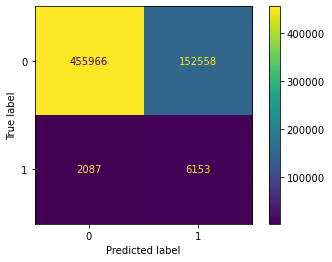

In [11]:
plot_confusion_matrix(search, X_test, y_test, labels = [0, 1])

<AxesSubplot:>

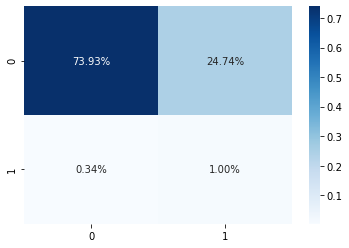

In [12]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [13]:
crlogbinary = pd.DataFrame(classification_report(y_test, y_pred, target_names =['Not Fatal', 'Fatal'], output_dict=True)).transpose()
crlogbinary


,precision,recall,f1-score,support
Not Fatal,0.995444,0.749298,0.855008,608524.000000
Fatal,0.038769,0.746723,0.073710,8240.000000
accuracy,0.749264,0.749264,0.749264,0.749264
macro avg,0.517106,0.748011,0.464359,616764.000000
weighted avg,0.982663,0.749264,0.844570,616764.000000


In [14]:
y_pred_proba = search.predict_proba(X_test)[:,1]
y_pred_proba = y_pred_proba.reshape(-1, 1)
y_pred_proba.shape

(616764, 1)

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

Text(0.5, 1.0, 'ROC curve for Logistic Regression')

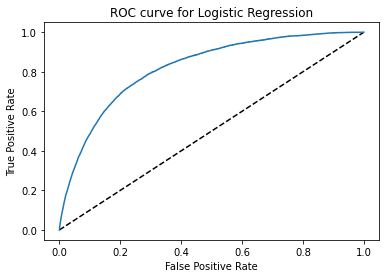

In [16]:
#plot ROC Curve





plt.plot([0,1],[0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression')

I dont find this model/classifier's performance to be great, but it does "catch" a the majority of the 'Fatal' category. 

There are 8240 fatal responses in the test set, and this classifier predicts ~75 % of those correctly. It does this however, at the cost of predicting many more fatalitie than actualy exist in the test set. It predicts roughly 158,000 fatalities out of a test set of 616764 observations.


# Random Forest Modelling - Fatal vs. Non-Fatal

This model investigate the random forest classifeir on a binary response, Fatal or Non-Fatal, using RandomSearchCV, as the times to use GridSearchCV would be very high.

In [17]:
#RandomForestClassifier?

In [18]:
# Random Forest class with Class weights

clf = RandomForestClassifier()

random_grid ={'max_depth': [2,5,7],
             'min_samples_leaf': [1, 3, 5],
             'min_samples_split': [2, 3, 4, 5],
             'n_estimators': [100],
             'class_weight' : ["balanced"]
             }

rfclf = RandomizedSearchCV(clf, param_distributions = random_grid, n_jobs=1)

Train model, save to disk, all commented out because this woudl take several hours if fit every time the notebook was run. 

In [19]:
#Train Random Forest

#start = time.time()
#rfclf.fit(X_train, y_train)
#message("Train_time="+str(round(((time.time()-start) /3600),3)) + ' hours')

In [20]:
#save Model to disk

#with open('../models/rfmodel.pkl', 'wb') as file:
#    pickle.dump(rfclf, file)

In [21]:
rfclf = pickle.load(open('../models/rfmodel.pkl', 'rb'))
y_pred = rfclf.predict(X_test)

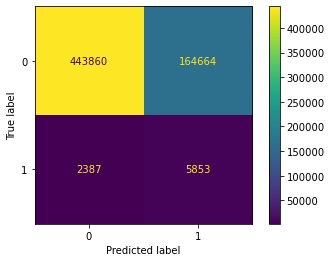

In [22]:
plot_confusion_matrix(rfclf, X_test, y_test, labels = [0, 1])

<AxesSubplot:>

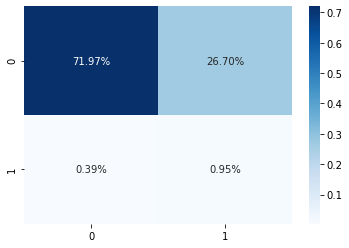

In [23]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [24]:
crrfbinary = pd.DataFrame(classification_report(y_test, y_pred, target_names =['Not Fatal', 'Fatal'], output_dict=True)).transpose()
crrfbinary


print(classification_report(y_test, y_pred, target_names=['Not Fatal', 'Fatal']))

              precision    recall  f1-score   support

   Not Fatal       0.99      0.73      0.84    608524
       Fatal       0.03      0.71      0.07      8240

    accuracy                           0.73    616764
   macro avg       0.51      0.72      0.45    616764
weighted avg       0.98      0.73      0.83    616764



In [25]:
y_pred_proba = rfclf.predict_proba(X_test)[:,1]
y_pred_proba = y_pred_proba.reshape(-1, 1)
y_pred_proba.shape

(616764, 1)

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

Text(0.5, 1.0, 'ROC curve for Random Forest Model')

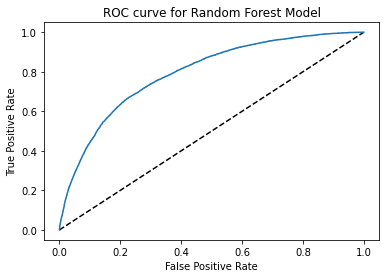

In [27]:
plt.plot([0,1],[0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest Model')

This model peformes slightly wors than the logistic model, and 
will not be selected

# XGB on Binary response (Fatal vs not Fatal)

Importing and using the XGB classifier

In [28]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

In [29]:
#XGBClassifier?

In [30]:
compute_sample_weight(class_weight='balanced', y=y_train)

array([0.50670317, 0.50670317, 0.50670317, ..., 0.50670317, 0.50670317,
       0.50670317])

In [31]:
xgbclf = XGBClassifier()
param_grid = {'max_depth': [1, 5, 10],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100],
        'scale_pos_weight' : [(y_train==0).sum()/ (y_train==1).sum()]}

Imbalanced Classes, Ratio of Non-Fatal/Fatal

In [32]:
#Manual computer Class Weight/Ratio
(y_train==0).sum()/ (y_train==1).sum()

74.59160626116189

In [33]:
rdmxgb = RandomizedSearchCV(xgbclf, param_distributions = param_grid, n_jobs=1)

Fit and save/export model, this step would take several hours so it is commented out so it will nto run every time the model runs

In [34]:
#Fit RandomSearch XGB Classifier


#start = time.time()
#rdmxgb.fit(X_train, y_train)
#message('Train_time='+str(round(((time.time()-start) /3600),3)) + ' hours')

In [35]:
#Save Classifer to disk

#with open('../models/xgbmodel.pkl', 'wb') as file:
#    pickle.dump(rdmxgb, file)

In [36]:
rdmxgb = pickle.load(open('../models/xgbmodel.pkl', 'rb'))
y_pred = rdmxgb.predict(X_test)

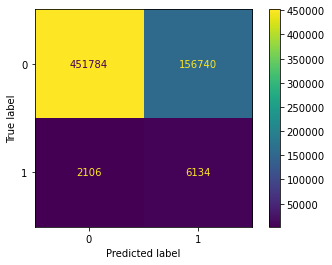

In [37]:
plot_confusion_matrix(rdmxgb, X_test, y_test, labels = [0, 1])


<AxesSubplot:>

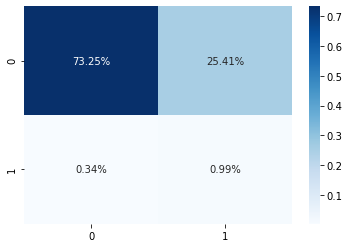

In [38]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [39]:
crxgbbinary = pd.DataFrame(classification_report(y_test, y_pred, target_names =['Not Fatal', 'Fatal'], output_dict=True)).transpose()
crxgbbinary
#print(classification_report(y_test, y_pred, target_names=['Not Fatal', 'Fatal']))

,precision,recall,f1-score,support
Not Fatal,0.995360,0.742426,0.850486,608524.000000
Fatal,0.037661,0.744417,0.071695,8240.000000
accuracy,0.742453,0.742453,0.742453,0.742453
macro avg,0.516511,0.743422,0.461090,616764.000000
weighted avg,0.982565,0.742453,0.840081,616764.000000


In [40]:
y_pred_proba = rdmxgb.predict_proba(X_test)[:,1]
y_pred_proba = y_pred_proba.reshape(-1, 1)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

Text(0.5, 1.0, 'ROC curve XGBoost Binary Model')

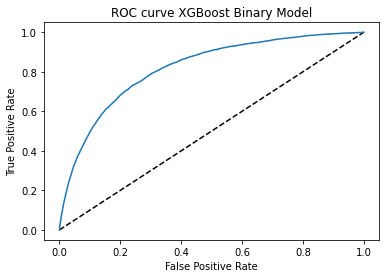

In [41]:
plt.plot([0,1],[0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve XGBoost Binary Model')

This model has a similar performance ot the Logistic model, although it classifies more as fatal that are not, and doesnt predict as many Fatal correctly, which is our goal, the Logistic Model is still superior.

# MultiClass  Modeling



# Logistic with Dummy variables

In [42]:
#Sklearn Logistic Regression Requires target be one dimensional

onedimy = y[y==1].stack().reset_index().drop(0,1).set_index('level_0')

onedimy.head(2)


,level_1
level_0,
1,Slight
2,Slight


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,onedimy, test_size=0.30, random_state=42)
#y_train.head()

In [44]:
#Creating a RandomSearchCV for Logistic Regression, Multiclass

logmulti = LogisticRegression(solver='saga', 
                              tol=1e-2, 
                              max_iter=200,
                              random_state=1,
                              n_jobs=1,
                              class_weight='balanced',
                              multi_class='auto')
distributions = dict(C=np.arange(0,11), penalty=['l2','elasticnet'])
rdmlogmulti = RandomizedSearchCV(logmulti, distributions, random_state=0)

In [45]:
#Fit Model and Save to disk


#rdmlogmulti.fit(X_train, y_train)
#with open('../models/rdmlogmulti.pkl', 'wb') as file:
#     pickle.dump(rdmlogmulti, file)


In [46]:
#save model to disk

#with open('../models/rdmlogmulti.pkl', 'wb') as file:
#    pickle.dump(rdmlogmulti, file)

In [47]:
rdmlogmulti = pickle.load(open('../models/rdmlogmulti.pkl', 'rb'))
y_pred = rdmlogmulti.predict(X_test)

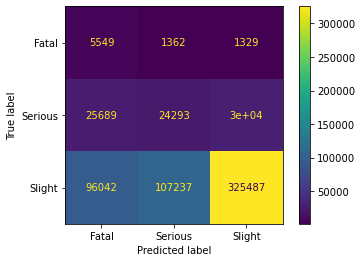

In [48]:
plot_confusion_matrix(rdmlogmulti, X_test, y_test)

<AxesSubplot:>

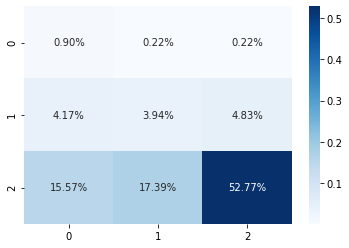

In [49]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [50]:
crlogmulti1 = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
crlogmulti1

#print(classification_report(y_test, y_pred))

,precision,recall,f1-score,support
Fatal,0.043597,0.673422,0.081892,8240.000000
Serious,0.182803,0.304584,0.228479,79758.000000
Slight,0.912771,0.615560,0.735266,528766.000000
accuracy,0.576118,0.576118,0.576118,0.576118
macro avg,0.379724,0.531189,0.348546,616764.000000
weighted avg,0.806762,0.576118,0.661001,616764.000000


# One Vs. Rest Classifier with Logistic Regression - Multiclass

In [51]:
#instaniate Randomizedsearch for Logisitic Model One vs Rest

ovr=OneVsRestClassifier(LogisticRegression(solver='saga', 
                     tol=1e-2, 
                     max_iter=200,
                     random_state=1,
                     n_jobs=1,
                     class_weight='balanced',
                     multi_class='auto'))

distributions = dict(estimator__penalty=['l2','elasticnet'],
                     estimator__C=np.arange(1,11)
                    )

OVRrdm = RandomizedSearchCV(ovr, distributions, random_state=0)

In [52]:

#OVRrdm.fit(X_train, y_train)
#with open('../models/OVRrdm.pkl', 'wb') as file:
#    pickle.dump(OVRrdm, file)


Load model and predict

In [53]:
OVRrdm = pickle.load(open('../models/OVRrdm.pkl', 'rb'))
y_pred= OVRrdm.predict(X_test)

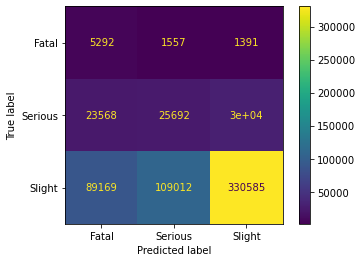

In [54]:
plot_confusion_matrix(OVRrdm, X_test, y_test)

<AxesSubplot:>

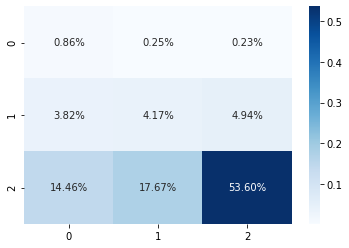

In [55]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [56]:
crlogmulti2 = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
crlogmulti2

#print(classification_report(y_test, y_pred))

,precision,recall,f1-score,support
Fatal,0.044836,0.642233,0.083821,8240.000000
Serious,0.188550,0.322124,0.237868,79758.000000
Slight,0.912024,0.625201,0.741854,528766.000000
accuracy,0.586236,0.586236,0.586236,0.586236
macro avg,0.381803,0.529853,0.354514,616764.000000
weighted avg,0.806881,0.586236,0.667889,616764.000000


# SMOTE + Logistic  - Multiclass Model

This model was looked at as an attempt to deal with the imbalanced classes within the dataset, by making many synthetic samples for training

In [57]:
#import
from imblearn.over_sampling import SMOTE

In [58]:
#slipt
X_train, X_test, y_train, y_test = train_test_split(X,onedimy, test_size=0.30, random_state=42)

This step is commented out becasue of the time it takes to create the syntetic samples, and the model ans been created/fit/saved already  below

In [59]:
#instantiate/fit --create synthetic data
#oversample = SMOTE()
#X_train, y_train = oversample.fit_resample(X_train, y_train)

In [60]:
#X_train.shape, y_train.shape

In [61]:
ovr=OneVsRestClassifier(LogisticRegression(solver='saga', 
                     tol=1e-2, 
                     max_iter=200,
                     random_state=1,
                     n_jobs=1,
                     class_weight='balanced',
                     multi_class='auto'))

distributions = dict(estimator__penalty=['l2','elasticnet'],
                     estimator__C=np.arange(1,11)
                    )

OVR_rdm_SMOTE = RandomizedSearchCV(ovr, distributions, random_state=0)

In [62]:
#OVR_rdm_SMOTE.fit(X_train, y_train)
#with open('../models/OVR_rdm_SMOTE.pkl', 'wb') as file:
#    pickle.dump(OVR_rdm_SMOTE, file)

Load model and predict

In [63]:
OVR_rdm_SMOTE = pickle.load(open('../models/OVR_rdm_SMOTE.pkl', 'rb'))
y_pred = OVR_rdm_SMOTE.predict(X_test)

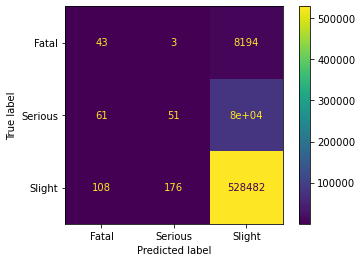

In [64]:
#y_pred = OVR_rdm_SMOTE.predict(X_test)
plot_confusion_matrix(OVR_rdm_SMOTE, X_test, y_test)

In [65]:
crsmotemulti = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
crsmotemulti


,precision,recall,f1-score,support
Fatal,0.202830,0.005218,0.010175,8240.000000
Serious,0.221739,0.000639,0.001275,79758.000000
Slight,0.857477,0.999463,0.923042,528766.000000
accuracy,0.857015,0.857015,0.857015,0.857015
macro avg,0.427349,0.335107,0.311497,616764.000000
weighted avg,0.766519,0.857015,0.791646,616764.000000


The combonation of SMOTE, Logistic/One Vs. Rest, produced a poor model. It end up classifying most observations as "Slight"

# Random Forest Model - MultiClass 

In [66]:
clfmulti = RandomForestClassifier()

random_grid ={'max_depth': [2,5,7],
             'min_samples_leaf': [1, 3, 5],
             'min_samples_split': [2, 3, 4, 5],
             'n_estimators': [200],
             'class_weight' : ["balanced"]
             }

rfclfmulti = RandomizedSearchCV(clfmulti, param_distributions = random_grid, n_jobs=1)

In [67]:
#rfclfmulti.fit(X_train, y_train)
#with open('../models/rfclfmulti.pkl', 'wb') as file:
#    pickle.dump(rfclfmulti, file)

In [68]:
rfclfmulti = pickle.load(open('../models/rfclfmulti.pkl', 'rb'))
y_pred = rfclfmulti.predict(X_test)

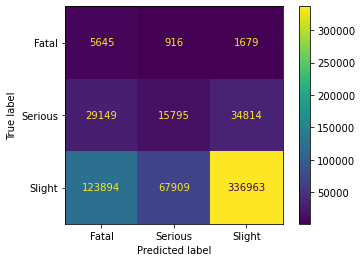

In [69]:
plot_confusion_matrix(rfclfmulti, X_test, y_test)

<AxesSubplot:>

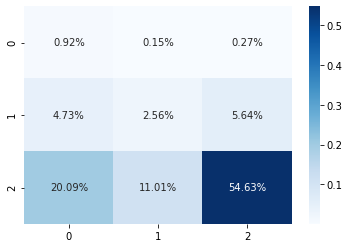

In [70]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [71]:
#print(classification_report(y_test, y_pred))

In [72]:
crrdfmulti = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
crrdfmulti

,precision,recall,f1-score,support
Fatal,0.035573,0.685073,0.067634,8240.000000
Serious,0.186658,0.198037,0.192179,79758.000000
Slight,0.902283,0.637263,0.746962,528766.000000
accuracy,0.581102,0.581102,0.581102,0.581102
macro avg,0.374838,0.506791,0.335592,616764.000000
weighted avg,0.798161,0.581102,0.666144,616764.000000


# Conclusions/Discussion

My first idea with these selected features was to look at just the accidents that result in Fatalities, and see if that was predictable. I went through many iterations of modeling parameters/tuning, and my results are below.

First we will combined the results of our "Fatal" or "Non-Fatal" classification tables into one table for comparison.



In [160]:
#here I am creating lists of the classification reports for each model, to be merged together for comparison
classification_reports_binary_models = [crlogbinary, crrfbinary, crxgbbinary] 
classification_reports_multiclass_models = [crlogmulti1, crlogmulti2, crrdfmulti, crsmotemulti] 

In [156]:
binarydf = pd.concat(classification_reports_binary_models, axis=1)
binary_df = binarydf.drop(columns='support')

In [158]:
index1 =  pd.MultiIndex.from_tuples([
('Logistic Binary Response', 'precision'), 
('Logistic Binary Response', 'recall'),
('Logistic Binary Response', 'F1-Score'),
('Random Forest Binary Response', 'precision'),
('Random Forest Binary Response', 'recall'),
('Random Forest Binary Response', 'F1-Score'),
('XGB Binary Response', 'precision'),
('XGB Binary Response', 'recall'),
('XGB Binary Response', 'F1-Score')
])
binary_df.columns=index1
binary_df

Logistic Binary Response                      \
                            precision    recall  F1-Score   
Not Fatal                    0.995444  0.749298  0.855008   
Fatal                        0.038769  0.746723  0.073710   
accuracy                     0.749264  0.749264  0.749264   
macro avg                    0.517106  0.748011  0.464359   
weighted avg                 0.982663  0.749264  0.844570   

             Random Forest Binary Response                      \
                                 precision    recall  F1-Score   
Not Fatal                         0.994651  0.729404  0.841623   
Fatal                             0.034325  0.710316  0.065486   
accuracy                          0.729149  0.729149  0.729149   
macro avg                         0.514488  0.719860  0.453554   
weighted avg                      0.981821  0.729149  0.831254   

             XGB Binary Response                      
                       precision    recall  F1-Score  
Not Fatal               0.995360  0.742426  0.850486  
Fatal                   0.037661  0.744417  0.071695  
accuracy                0.742453  0.742453  0.742453  
macro avg               0.516511  0.743422  0.461090  
weighted avg            0.982565  0.742453  0.840081

I am sure there are more elegant ways to arrive at this table, but we can see that if we are just trying to predict "Fatal" vs. "Non-Fatal", the model that gives the best performance is the first model, the "Logsitic Model", it classifies 74.7 percent of True/Actual Fatal accident at Predicted Fatal.

However, it does this at the cost of classifying many Non-Fatal accidents as Fatal. That said, predicting 74% of actual fatalities correctly as fatalities,  could be very valuable information(even if it classifies a significant number Fatal that are not) , 

To imagine this used in a "live" setting, it could be used at a warning:

Ex. "Please consider delaying your planned drive,vehicle accidents in these conditions are predicted to be Fatal, wait 30 minutes and refresh your route". 

Anyone can imagine a warning such as this from your vehicle, or navigation device, would be effective at increasing "caution" when driving. 

In [142]:
multidf  = pd.concat([crlogmulti1, crlogmulti2, crrdfmulti, crsmotemulti], axis=1)
multidf = multidf.drop(columns = 'support')

In [143]:
index =  pd.MultiIndex.from_tuples([
('Logistic Model Multiclass', 'precision'), 
('Logistic Model Multiclass', 'recall'),
('Logistic Model Multiclass', 'F1-Score'),
('Logistic Model Multiclass OneVsRest', 'precision'),
('Logistic Model Multiclass OneVsRest', 'recall'),
('Logistic Model Multiclass OneVsRest', 'F1-Score'),
('Random Forest Multiclass', 'precision'),
('Random Forest Multiclass', 'recall'),
('Random Forest Multiclass', 'F1-Score'),
('Smote Logistic Multiclass', 'precision'),
('Smote Logistic Multiclass', 'recall'),
('Smote Logistic Multiclass', 'F1-Score'),
])
multidf.columns =index
multidf

Logistic Model Multiclass                      \
                             precision    recall  F1-Score   
Fatal                         0.043597  0.673422  0.081892   
Serious                       0.182803  0.304584  0.228479   
Slight                        0.912771  0.615560  0.735266   
accuracy                      0.576118  0.576118  0.576118   
macro avg                     0.379724  0.531189  0.348546   
weighted avg                  0.806762  0.576118  0.661001   

             Logistic Model Multiclass OneVsRest                      \
                                       precision    recall  F1-Score   
Fatal                                   0.044836  0.642233  0.083821   
Serious                                 0.188550  0.322124  0.237868   
Slight                                  0.912024  0.625201  0.741854   
accuracy                                0.586236  0.586236  0.586236   
macro avg                               0.381803  0.529853  0.354514   
weighted avg                            0.806881  0.586236  0.667889   

             Random Forest Multiclass                      \
                            precision    recall  F1-Score   
Fatal                        0.035573  0.685073  0.067634   
Serious                      0.186658  0.198037  0.192179   
Slight                       0.902283  0.637263  0.746962   
accuracy                     0.581102  0.581102  0.581102   
macro avg                    0.374838  0.506791  0.335592   
weighted avg                 0.798161  0.581102  0.666144   

             Smote Logistic Multiclass                      
                             precision    recall  F1-Score  
Fatal                         0.202830  0.005218  0.010175  
Serious                       0.221739  0.000639  0.001275  
Slight                        0.857477  0.999463  0.923042  
accuracy                      0.857015  0.857015  0.857015  
macro avg                     0.427349  0.335107  0.311497  
weighted avg                  0.766519  0.857015  0.791646

# Best Model

The idea of this project was to use variables/features of an accident that a present before or during the accident, weather conditions/driver info/vehicle info/time of day/road info, to predict the severity of the resultant accident(s)


Once again, I am sure there are more elegant ways to produce this table. Three of the models are faily close to one another, the SMOTE/Logistic model I produced performed extremely poorly and will be thrown out of consideration. 

Of the remaning models produced, I prefer the "Logistic Model Multiclass One VS. Rest model".

It is not the best predictor for the "Fatal" category, however, it correctly classifies 32% of Serious Category, where as the other do not perform well in this category, and does well with the Slight category as well. 

It has the highest accuracy score, at %58.6 of observations, which, on its surface is not great in the world of classifiers.

This modeling notebook was a learning experience for me in many respects, model tuning, pickling/loading models, the use of Several Modeling techiniques and evaluation methods. 

# Ideas to investigate further


I felt my knowledge/use of XGB classifier was limited/fledgling, and I know it is a powerful classifer. I feel that there could be gains to be had with this model, however, I just dont have the experience with it(at this point) and time to spend to tune it correctly. 

I also attempted the use of SMOTE, however, it did not produce great results and it took quite a bit of time to create the synthetic training set, and then train the model.  I may revisit this.